In [1]:
import myutil as mu



--- 
 - 자연어 처리 전처리 이해하기 
   - 자연어 처리는 일반적으로 토큰화, 단어 집합 생성, 정수 인코딩, 패딩, 벡터화의 과정을 거칩니다. 
   - 이번 챕터에서는 이러한 전반적인 과정에 대해서 이해합니다. 


--- 
 - spaCy 사용하기 
 
 ``` 
 pip install spacy 
 python3 -m spacy download en 
 ``` 


In [2]:

import spacy

en_text = "A Dog Run back corner near spare bedrooms"
spacy_en = spacy.load("en")
mu.log("spacy_en", spacy_en)


def tokenize(en_text):
    return [
        tok.text
        for tok in spacy_en.tokenizer(en_text)
    ]


mu.log("tokenize(en_text)", tokenize(en_text))



spacy_en : <spacy.lang.en.English object at 0x7f100ed8da30>
tokenize(en_text) : ['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


--- 
 - NLTK 사용하기 
 
 ``` 
 pip install nltk 
 ``` 
 


In [3]:

import nltk
from nltk.tokenize import word_tokenize

nltk.download("punkt")
mu.log("word_tokenize(en_text)", word_tokenize(en_text))



word_tokenize(en_text) : ['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


[nltk_data] Downloading package punkt to /home/hhd/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


--- 
 - 띄어쓰기로 토큰화 


In [4]:

mu.log("en_text.split()", en_text.split())



en_text.split() : ['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


--- 
 - 띄어쓰기로 토큰화 
   - 위의 예제에서는 '사과'란 단어가 총 4번 등장했는데 
   - 모두 '의', '를', '가', '랑' 등이 붙어있어 
   - 이를 제거해주지 않으면 기계는 전부 다른 단어로 인식하게 됩니다. 


In [5]:

kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"
mu.log("kor_text.split()", kor_text.split())



kor_text.split() : ['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사왔어']


--- 
 - 형태소 토큰화 
   - 위와 같은 상황을 방지하기 위해서 한국어는 보편적으로 '형태소 분석기'로 토큰화를 합니다. 
   - 여기서는 형태소 분석기 중에서 mecab을 사용해보겠습니다. 
   - 아래의 커맨드로 colab에서 mecab을 설치합니다. 
   - 앞선 예와 다르게 '의', '를', '가', '랑' 등이 전부 분리되어 기계는 '사과'라는 단어를 하나의 단어로 처리할 수 있습니다. 
 
 ``` 
 git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 
 cd Mecab-ko-for-Google-Colab 
 chmod u+x install_mecab-ko_on_colab190912.sh 
 ./install_mecab-ko_on_colab190912.sh 
 ``` 


In [6]:


from konlpy.tag import Mecab

tokenizer = Mecab()
mu.log("tokenizer.morphs(kor_text)", tokenizer.morphs(kor_text))



tokenizer.morphs(kor_text) : ['사과', '의', '놀라운', '효능', '이', '라는', '글', '을', '봤', '어', '.', '그래서', '오늘', '사과', '를', '먹', '으려고', '했', '는데', '사과', '가', '썩', '어서', '슈퍼', '에', '가', '서', '사과', '랑', '오렌지', '사', '왔', '어']


--- 
 - 단어 집합(Vocabulary) 생성 
   - 단어 집합(vocabuary)이란 중복을 제거한 텍스트의 총 단어의 집합(set)을 의미합니다. 
   - 우선, 실습을 위해서 깃허브에서 '네이버 영화 리뷰 분류하기' 데이터를 다운로드하겠습니다. 
   - 네이버 영화 리뷰 데이터는 총 20만 개의 영화 리뷰를 긍정 1, 부정 0으로 레이블링한 데이터입니다. 
 
 ``` 
 pip3 install pandas 
 ``` 


In [7]:

import urllib.request
import pandas as pd
from konlpy.tag import Mecab
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

urllib.request.urlretrieve(
    url="https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt",
    filename="ratings.txt"
)

data = pd.read_table("ratings.txt")
mu.log("len(data)", len(data))
mu.log("data[:10]", data[:10])
sample_data = data[:100]

# 불용어 정의
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']
tokenized = []

for sentence in sample_data["document"]:
    temp = []
    temp = tokenizer.morphs(sentence)

    temp = [
        word
        for word in temp
        if not word in stopwords
    ]

    tokenized.append(temp)

mu.log("tokenized[:10]", tokenized[:10])

vocab = FreqDist(np.hstack(tokenized))
mu.log("len(vocab)", len(vocab))
mu.log("vocab['재밌']", vocab['재밌'])



len(data) : 200000

data[:10] : 
             id                                           document  label
    0   8112052                                어릴때보고 지금다시봐도 재밌어요ㅋㅋ      1
    1   8132799  디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...      1
    2   4655635               폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.      1
    3   9251303  와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...      1
    4  10067386                        안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.      1
    5   2190435                      사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화      1
    6   9279041                                   완전 감동입니다 다시봐도 감동      1
    7   7865729                        개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음      1
    8   7477618                                                  굿      1
    9   9250537                                     바보가 아니라 병 쉰 인듯      1

tokenized[:10] : [['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '학생', ',', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전

--- 
 - 각 단어에 고유한 정수 부여 
   - enumerate()는 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 
   - 인덱스를 순차적으로 함께 리턴한다는 특징이 있습니다. 
   - 인덱스 0과 1은 다른 용도로 남겨두고 나머지 단어들은 2부터 501까지 순차적으로 인덱스를 부여해봅시다. 


In [8]:

word_to_index = {
    word[0]: index + 2
    for index, word in enumerate(vocab)
}

word_to_index["pad"] = 0
word_to_index["unk"] = 1
mu.log("len(word_to_index)", len(word_to_index))

encoded = []

for line in tokenized:
    temp = []
    for w in line:
        try:
            temp.append(word_to_index[w])
        except:
            temp.append(word_to_index["unk"])
    encoded.append(temp)

mu.log("len(encoded)", len(encoded))
mu.log("encoded[:10]", encoded[:10])



len(word_to_index) : 368
len(encoded) : 100
encoded[:10] : [[1, 594, 626, 267, 1, 1, 1, 1, 1, 1], [1, 6, 1, 1, 19, 1, 1, 623, 1, 1, 6, 1, 1, 164, 1, 1, 1, 1, 30, 1, 1, 1, 1, 623, 1, 1, 126, 1, 1, 6, 1, 1, 21, 1, 8, 650, 543, 21, 1, 214, 6, 215, 267, 1, 584, 8, 1, 37, 1, 1, 30], [1, 1, 1, 599, 1, 220, 1, 1, 222, 1, 424, 184, 30, 30, 1, 30], [30, 30, 1, 1, 128, 223, 1, 30, 30, 1, 1, 1, 1, 638, 1, 1, 1, 17, 681, 30, 30, 1, 1, 9, 1, 1, 225], [1, 1, 1, 232, 8, 1, 21, 1, 30], [1, 6, 164, 577, 1, 1, 1, 1, 126, 1, 685, 6, 584, 8, 1], [1, 1, 1, 1, 1, 1], [128, 1, 652, 1, 1, 29, 1, 92, 599, 582, 530, 626, 267, 51, 184], [61], [1, 1, 596, 239, 240, 429, 95]]


--- 
 - 길이가 다른 문장들을 모두 동일한 길이로 바꿔주는 패딩(padding) 
   - 이제 길이가 다른 리뷰들을 모두 동일한 길이로 바꿔주는 패딩 작업을 진행해보겠습니다. 
   - 앞서 단어 집합에 패딩을 위한 토큰인 'pad'를 추가했었습니다. 
   - 패딩 작업은 정해준 길이로 모든 샘플들의 길이를 맞춰주되, 
   - 길이가 정해준 길이보다 짧은 샘플들에는 'pad' 토큰을 추가하여 길이를 맞춰주는 작업입니다. 


max_len : 63
min_len : 1


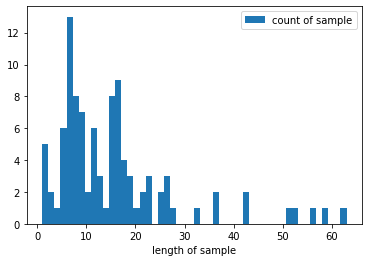

encoded[:3] : [[1, 594, 626, 267, 1, 1, 1, 1, 1, 1], [1, 6, 1, 1, 19, 1, 1, 623, 1, 1, 6, 1, 1, 164, 1, 1, 1, 1, 30, 1, 1, 1, 1, 623, 1, 1, 126, 1, 1, 6, 1, 1, 21, 1, 8, 650, 543, 21, 1, 214, 6, 215, 267, 1, 584, 8, 1, 37, 1, 1, 30], [1, 1, 1, 599, 1, 220, 1, 1, 222, 1, 424, 184, 30, 30, 1, 30]]


In [9]:

len_array = []
for line in encoded:
    len_array.append(len(line))

max_len = max(len_array)
mu.log("max_len", max_len)
min_len = min(len_array)
mu.log("min_len", min_len)

plt.hist(len_array, bins=50, label="count of sample")
plt.xlabel("length of sample")
plt.legend()
plt.show()

mu.log("encoded[:3]", encoded[:3])
